In [5]:
import pandas as pd

In [6]:
df = pd.read_csv('../data/raw/jobs_data.csv')
df.head()

,job_id,work_model,job_title,company_name,location,time_posted,num_applicants,xp_level,job_type,job_sectors,job_description
0,4190732442,Remoto,Data Analyst,Dandy,Brasil,Há 1 dia,88 candidaturas,Assistente,Tempo integral,Fabricação de instrumentos e materiais para us...,Dandy is transforming the massive ($200B) but ...
1,4172358585,Remoto,Data Analyst,Onebridge,Brasil,Há 1 semana,NaN,Pleno-sênior,Tempo integral,Atividades dos serviços de tecnologia da infor...,Onebridge is a Consulting firm with an HQ in I...
2,4186560108,Remoto,Data Analyst,HCLTech,Brasil,Há 3 semanas,NaN,Pleno-sênior,Tempo integral,"Tecnologia, Informação e Mídia","HCLTech is a global technology company, spread..."
3,4191627456,Remoto,Data Analyst,"CloudWalk, Inc.","São Paulo, SP",Há 2 semanas,88 candidaturas,Não aplicável,Tempo integral,Tecnologia da informação e serviços,About CloudWalk:\nWe are not just another fint...
4,4200988702,Remoto,Data Analyst,iVisa,Brasil,Há 1 semana,NaN,Pleno-sênior,Tempo integral,Tecnologia da informação e serviços,We’re growing! Don't miss the opportunity to b...


In [3]:
df['job_title'].drop_duplicates().to_csv('job_titles.csv')

In [4]:
pd.read_csv('job_titles.txt')

,Unnamed: 0,job_title
0,0,Data Analyst
1,5,"Senior Data Analyst, BI & Reporting"
2,6,Sr. Data Analyst
3,7,"Mid Level Data Analyst (Rio de Janeiro), Brazil"
4,8,Analista de Dados Pleno
...,...,...
1791,2509,Azure DevOps Engineer - Senior
1792,2510,Solutions Consultant
1793,2511,Solutions Architect - Azure
1794,2512,Sales Excellence COE - Data Specialist


In [11]:
pd.read_csv('../data/processed/df_skills.csv').sample(10).to_csv('sample_skills.csv')

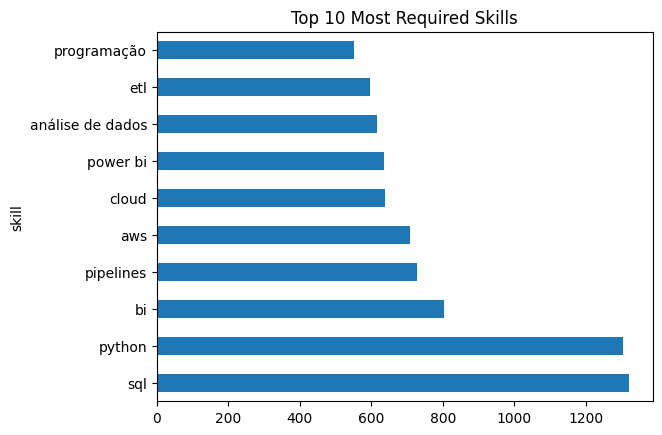

work_model             Híbrido  Presencial  Remoto
skill                                             
a/b testing                  8           2      14
adaptabilidade              10          18      22
ai                          66          34     109
airflow                     73          94     145
análise de dados           172         320     125
...                        ...         ...     ...
testes a/b                  11          15       8
time series                  5           2       9
trabalho em equipe          31          83      48
visualização de dados       96          99      63
visão computacional          8           8      16

[94 rows x 3 columns]


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
jobs = pd.read_csv('../data/processed/df_jobs.csv')
skills = pd.read_csv('../data/processed/df_skills.csv')

In [23]:
import pandas as pd
import io
import re

In [ ]:
# Read the data into a DataFrame, skipping the first line which is a source marker
df = jobs.copy()

# Drop rows with missing job titles if any
df.dropna(subset=['job_title'], inplace=True)

# Ensure job_title is string type
df['job_title'] = df['job_title'].astype(str)

# --- Classification Logic ---
def classify_job_title(title):
    """
    Classifies a job title into predefined categories or suggests a new one.
    """
    title_lower = title.lower()

    cleaned_title = ' '.join(title_lower.split()) 
    print(cleaned_title)

    if 'business intelligence' in cleaned_title or 'analista de bi' in cleaned_title or 'bi analyst' in cleaned_title or 'power bi' in cleaned_title or \
        ('analista de dados' in cleaned_title and 'bi' in cleaned_title) or ('data analyst' in cleaned_title and 'bi' in cleaned_title) or \
            ('engenheiro de dados' in cleaned_title and 'bi' in cleaned_title):
        return 'Analista de BI'
    
    if ('engenheiro' in cleaned_title and 'analytics' in cleaned_title) or ('analytics' in cleaned_title and 'engineer' in cleaned_title) or \
        ('engenh' in cleaned_title and re.search(r'an[áa]l[ií]t', cleaned_title)):
        return 'Analytics Engineer'
    
    if 'machine learning engineer' in cleaned_title or ('engenheiro' in cleaned_title and 'machine' in cleaned_title) or 'ml engineer' in cleaned_title or \
        'mlops' in cleaned_title or 'engenheiro ml' in cleaned_title:
        return 'Engenheiro de Machine Learning'
    
    if 'data analyst' in cleaned_title or 'analista' in cleaned_title or 'analista dados' in cleaned_title or re.search(r'an[áa]lise de dados', cleaned_title) or\
          'analytics' in cleaned_title or ('assistente' in cleaned_title and 'dados' in cleaned_title): 
        if 'business intelligence' in title_lower or ' bi' in title_lower: return 'Analista de BI'
        if 'sql' in cleaned_title: return 'Analista de Dados' 
        if 'reporting' in cleaned_title: return 'Analista de Dados' 
        return 'Analista de Dados'
    
    if 'ai engineer' in cleaned_title or 'engenheiro de ia' in cleaned_title or re.search(r'engenheiro de intelig[êe]ncia artificial', cleaned_title) or \
        ('eng' in cleaned_title and ' ia' in cleaned_title) or ('eng' in cleaned_title and 'ai ' in cleaned_title) or \
            ('eng' in cleaned_title and 'artificial intelligence' in cleaned_title) or 'ai specialist' in cleaned_title or \
                'engenheiro ai' in cleaned_title or 'prompt' in cleaned_title or (re.search(r'automa[cç][ãa]o', cleaned_title) and 'ia' in cleaned_title):
        if 'cientista' in cleaned_title or 'data scientist' in cleaned_title:
             return 'Cientista de Dados'
        return 'Engenheiro de IA'
    
    if ('cientista' in cleaned_title and 'dados' in cleaned_title) or 'data scientist' in cleaned_title or re.search(r'ci[êe]ncia de dados', cleaned_title) or \
        'ia' in cleaned_title or 'ml' in cleaned_title or 'artificial intelligence' in cleaned_title or 'machine learning' in cleaned_title or \
        'generativa' in cleaned_title or 'nlp' in cleaned_title or 'llm' in cleaned_title or 'computer vision' in cleaned_title:
            return 'Cientista de Dados'

    if 'data engineer' in cleaned_title or ('engenheiro' in cleaned_title and 'dados' in cleaned_title) or \
    ('eng' in cleaned_title and 'dados' in cleaned_title) or 'engenharia de dados' in cleaned_title or \
        'data platform' in cleaned_title or 'plataforma de dados' in cleaned_title or 'big data engineer' in cleaned_title or \
            'etl' in cleaned_title or 'data developer' in cleaned_title or ('engenheiro' in cleaned_title and 'observabilidade' in cleaned_title) or \
                'dataops' in cleaned_title or ('analista' in cleaned_title and 'engenharia de dados' in cleaned_title) or \
                    ('engenheiro' in cleaned_title and 'cloud' in cleaned_title) or ('engenheira' in cleaned_title and 'dados' in cleaned_title) or \
                        ('MS Fabric' in cleaned_title and 'engineer' in cleaned_title) or ('aws' in cleaned_title and 'engenh' in cleaned_title) or \
                            ('engenheiro' in cleaned_title and 'data' in cleaned_title):
        return 'Engenheiro de Dados'
    
    if 'software' in cleaned_title or 'engenheiro desenvolvedor' in cleaned_title or 'developer' in cleaned_title or \
        'desenvolvedor' in cleaned_title or 'backend' in cleaned_title or 'frontend' in cleaned_title or 'fullstack' in cleaned_title or \
            'full stack' in cleaned_title or 'java' in cleaned_title or 'python' in cleaned_title or 'net' in cleaned_title \
                or 'node' in cleaned_title or 'ios' in cleaned_title or 'android' in cleaned_title or 'sre' in cleaned_title or \
                    'confiabilidade' in cleaned_title or 'desenvolvimento' in cleaned_title or 'sistemas' in cleaned_title or \
                        'react' in cleaned_title or 'tooling' in cleaned_title or 'back-end' in cleaned_title:
        if 'data engineer' in cleaned_title or 'engenheiro de dados' in cleaned_title or 'eng de dados' in cleaned_title or 'dados' in cleaned_title:
             pass 
        else:
             return 'Engenheiro de Software'
        
    if 'arquiteto de dados' in cleaned_title or 'data architect' in cleaned_title or ('arq' in cleaned_title and 'dados' in cleaned_title) or \
        'architect' in cleaned_title or 'arquitet' in cleaned_title:
        return 'Arquiteto de Dados'
    if 'devops' in cleaned_title: return 'Engenheiro de DevOps'

    if 'dba' in cleaned_title or 'administrador de banco de dados' in cleaned_title or 'banco de dados' in cleaned_title:
        return 'Analista de Dados'
    if 'data steward' in cleaned_title:
        return 'Analista de Dados'
    if 'consultor' in cleaned_title and ('dados' in cleaned_title or 'data' in cleaned_title or 'bi' in cleaned_title or 'analytics' in cleaned_title):
         return 'Engenheiro de Dados'

    if 'coletor de dados' in cleaned_title: return 'Engenheiro de Dados'
    if 'business analyst' in cleaned_title or re.search(r'analista de neg[óo]cio', cleaned_title): return 'Analista de BI'
    if 'sql engineer' in cleaned_title : return 'Engenheiro de Dados' # Can be DE or DBA, but lean towards specific for now
    if 'pesquisador' in cleaned_title: return 'Cientista de Dados'

    if 'dados' in cleaned_title or 'data' in cleaned_title: 
        return 'Outros Dados' 

    return 'Outros'


In [ ]:
# Apply the classification function
df['classified_job_title'] = df['job_title'].apply(classify_job_title)

# Select and reorder columns for the final CSV
output_df = df[['job_title', 'classified_job_title']]

# Generate the CSV string
# csv_output = output_df.to_csv(index=False)

# Print the CSV output for display
# print("--- Classified Job Titles CSV ---")
# print(csv_output[:1000]) # Print first 1000 characters for preview
# print("...")
# print("--- End of Preview ---")
# print(f"\nTotal rows processed: {len(output_df)}")

data analyst
data analyst
data analyst
data analyst
data analyst
senior data analyst, bi & reporting
sr. data analyst
mid level data analyst (rio de janeiro), brazil
analista de dados pleno
product data analyst sênior
business data analyst
sql data analyst
data analyst specialist - operations
data analyst
senior data analyst
data analyst
data analyst / business data analyst
senior data analyst
data analyst [latam]
senior data analyst
senior data analyst, marketing
sr. consumer data analyst
business data analyst
senior data analyst
sql engineer
analista de dados pleno
data analyst
data scientist
data analyst iii | data for services
talent data analyst - remote
sr. data analyst
talent data analyst - remote
data analyst (subscriptions&pricing) id33722
senior data analyst
analista de dados - (vaga afirmativa para mulheres e/ou pessoas pretas, pardas e indígenas)
data analyst (subscriptions&pricing) id33722
senior data analyst
senior data analyst - remote work | ref#277787
data analyst (sub

In [432]:
output_df['classified_job_title'].value_counts()

classified_job_title
Analista de Dados                 655
Engenheiro de Dados               587
Cientista de Dados                523
Outros                            353
Engenheiro de Software            181
Analista de BI                     79
Engenheiro de IA                   38
Engenheiro de Machine Learning     30
Analytics Engineer                 25
Engenheiro de DevOps               19
Outros Dados                       13
Arquiteto de Dados                 12
Name: count, dtype: int64

In [435]:
output_df[~output_df['classified_job_title'].str.contains(
    'Engenheiro de Machine Learning|Analista de Dados|Engenheiro de Dados|Cientista de Dados|Analista de BI|Engenheiro de IA', na=False)].sample(10)

,job_title,classified_job_title
862,Engenheiro Civil - Auditor,Outros
737,ENGENHEIRO AGRIMENSOR - CANÃA DOS CARAJÁS/PARA...,Outros
753,Engenheiro(a) de Software Pl. Node - (Marketpl...,Engenheiro de Software
884,ENGENHEIRO DE SOFTWARE – PORTO ALEGRE – RS - P...,Engenheiro de Software
936,Engenheiro(a) Estrutural - Angra dos Reis - RJ,Outros
567,Engenheiro(a) de Computação - AM/BA/CE/RJ/RN/SE,Outros
843,Técnico de Planejamento (Civil / Manutenção),Outros
1652,Analytics Engineer Senior,Analytics Engineer
894,GERENTE DE PCP,Outros
1162,Engenheiro(a) de Software Sênior (Node.js/React),Engenheiro de Software


In [433]:
output_df.iloc[1468]

job_title               Gerente de Arquitetura
classified_job_title        Arquiteto de Dados
Name: 1468, dtype: object

In [407]:
cleaned_title = 'Computer Vision Engineer'
cleaned_title = cleaned_title.lower()
if ('cientista' in cleaned_title and 'dados' in cleaned_title) or 'data scientist' in cleaned_title or re.search(r'ci[êe]ncia de dados', cleaned_title):
      print('yes')
if 'ia' in cleaned_title or 'ml' in cleaned_title or 'artificial intelligence' in cleaned_title or 'machine learning' in cleaned_title or \
        'generativa' in cleaned_title or 'nlp' in cleaned_title or 'llm' in cleaned_title or 'computer' in cleaned_title:
            print('yes')

yes


In [404]:
classify_job_title('Computer Vision Engineer')

computer vision engineer


'Outros'

In [255]:
output_df[(output_df['job_title'].str.contains('[Aa]nalista')) & (~output_df['classified_job_title'].str.contains('Analista de Dados|Analista de BI'))]

,job_title,classified_job_title
405,Analista de Data & Analytics (Engenheiro de da...,Analytics Engineer
2389,Analytics Engineer Sênior (Analista de Dados\n...,Analytics Engineer
2399,Analytics Engineer Sênior (Analista de Dados,Analytics Engineer


In [364]:
output_df[output_df['job_title'].str.contains('DataOps')]

,job_title,classified_job_title
1184,Engenheiro de Plataforma DataOps - Sênior,Engenheiro de Dados


In [306]:
output_df[(output_df['classified_job_title'].str.contains('Arquiteto'))]

,job_title,classified_job_title
723,Pesquisador em Arquitetura de Dados e Engenhar...,Arquiteto de Dados
1271,SM 609 ESPEC TI - ARQ DE DADOS - HIBRIDO v.b,Arquiteto de Dados
1673,Arquiteto(a) de Dados,Arquiteto de Dados
1810,Sr Data Architect,Arquiteto de Dados
1844,Arquiteto de dados,Arquiteto de Dados
1868,Arquiteto de dados,Arquiteto de Dados
1869,Arquiteto de Dados GCP (Sênior),Arquiteto de Dados
1919,Arquiteto de dados / Arquiteto de Sistemas,Arquiteto de Dados
1925,Arquiteto de dados gcp senior,Arquiteto de Dados
2511,Solutions Architect - Azure,Arquiteto de Dados


In [17]:
pd.read_csv('../data/processed/df_skills.csv')

,job_id,skill
0,4190732442,predictive
1,4190732442,problem solving
2,4190732442,critical thinking
3,4190732442,sql
4,4190732442,data analysis
...,...,...
19188,4209405656,estatística
19189,4209405656,análise de dados
19190,4209405656,python
19191,4209405656,trabalho em equipe
